<h2>1. Preparation</h2>

In [1]:
import numpy
import matplotlib.pyplot as pyplot
import pandas
import re
import cv2
import time
import pickle
import os
import random

from os import listdir
from PIL import Image
from PIL.ImageOps import equalize
from sklearn.feature_extraction.text import CountVectorizer

from variables import race_path, pickle_path

In [2]:
directories = listdir(race_path)
directories

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black_and_tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly_coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat_coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short_haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'greater_swiss_mountain_dog',
 'great_dane',
 'great_pyrenees',
 'groenendael',


In [3]:
def class_files(path):
    # build a dictionary of all files in the repository based on the files extensions.
    files = listdir(path)
    dictExt = {}
    extensions = [r'.csv', r'.xls$', r'.xlsx', r'.json', r'.txt', r'.p$', '.jpg']

    for ext in extensions:
        regex = re.compile(ext)
        selectedFiles = list(filter(regex.search, files))
        cleanExt = re.sub('\.|\$', '', ext)
        dictExt[cleanExt] = selectedFiles

    return dictExt

In [4]:
class_files(race_path+'collie')

{'csv': [],
 'jpg': ['collie_10021.jpg',
  'collie_1005.jpg',
  'collie_10057.jpg',
  'collie_10170.jpg',
  'collie_10246.jpg',
  'collie_10377.jpg',
  'collie_10459.jpg',
  'collie_10675.jpg',
  'collie_10883.jpg',
  'collie_10965.jpg',
  'collie_11024.jpg',
  'collie_11148.jpg',
  'collie_1152.jpg',
  'collie_1199.jpg',
  'collie_124.jpg',
  'collie_12670.jpg',
  'collie_12714.jpg',
  'collie_13834.jpg',
  'collie_14089.jpg',
  'collie_14143.jpg',
  'collie_14653.jpg',
  'collie_14677.jpg',
  'collie_14736.jpg',
  'collie_14738.jpg',
  'collie_14811.jpg',
  'collie_14943.jpg',
  'collie_14999.jpg',
  'collie_15008.jpg',
  'collie_15054.jpg',
  'collie_15074.jpg',
  'collie_15169.jpg',
  'collie_15172.jpg',
  'collie_15284.jpg',
  'collie_15388.jpg',
  'collie_15408.jpg',
  'collie_15419.jpg',
  'collie_15508.jpg',
  'collie_15577.jpg',
  'collie_15613.jpg',
  'collie_15619.jpg',
  'collie_15622.jpg',
  'collie_15631.jpg',
  'collie_15637.jpg',
  'collie_15728.jpg',
  'collie_15735.jp

In [5]:
dict_race_pictures = {}
for directory in directories:
    dict_extensions_files = class_files(race_path + directory)
    dict_race_pictures[directory] = dict_extensions_files['jpg']

In [6]:
L_races = []
for race in dict_race_pictures.keys():
    L_races.append(race)
L_races

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black_and_tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly_coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat_coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short_haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'greater_swiss_mountain_dog',
 'great_dane',
 'great_pyrenees',
 'groenendael',


In [7]:
pickle.dump(L_races,open(pickle_path+"L_races.p", "wb"))

<h2>2. Define the train and test perimeters</h2>

In [8]:
dict_race_pictures_train = {}
dict_race_pictures_test = {}

dict_data = {
    'train_data_without_validation':{},
    'train_data_with_validation':{},
    'validation_data':{},
    'test_data':{}
}

for race in L_races :
    # build train and test dictionaries
    dict_race_pictures_train[race] = []
    dict_race_pictures_test[race] = []
    dict_data['train_data_without_validation'][race] = []
    dict_data['train_data_with_validation'][race] = []
    dict_data['validation_data'][race] = []
    dict_data['test_data'][race] = []
    
    n_pictures_in_race = len(dict_race_pictures[race])
    L_indexes = list(range(0,n_pictures_in_race))
    
    train_thresold = int(n_pictures_in_race*0.75)
    
    # train index
    L_train_indexes = random.sample(L_indexes, train_thresold)
    L_train_indexes = numpy.sort(L_train_indexes)
    
    # validation index
    n_pictures_in_train = len(L_train_indexes)
    val_thresold = int(n_pictures_in_train * 0.25)
    L_val_indexes = random.sample(list(L_train_indexes), val_thresold)
    L_val_indexes = numpy.sort(L_val_indexes)
    L_train_with_validation_indexes = [index for index in L_train_indexes if not index in L_val_indexes]
    
    # test index
    L_test_indexes = [index for index in L_indexes if not index in L_train_indexes]
    L_test_indexes = numpy.sort(L_test_indexes)
    
    for index in L_indexes :
        picture = dict_race_pictures[race][index]
        
        if index in L_test_indexes:
            dict_race_pictures_test[race].append(picture)
            dict_data['test_data'][race].append(picture)
        
        if index in L_train_indexes:
            dict_race_pictures_train[race].append(picture)
            dict_data['train_data_without_validation'][race].append(picture)
        
        if index in L_train_with_validation_indexes:
            dict_data['train_data_with_validation'][race].append(picture)
        
        if index in L_val_indexes:
            dict_data['validation_data'][race].append(picture)

In [9]:
dict_race_pictures_train

{'affenpinscher': ['affenpinscher_10147.jpg',
  'affenpinscher_10185.jpg',
  'affenpinscher_10437.jpg',
  'affenpinscher_10439.jpg',
  'affenpinscher_10787.jpg',
  'affenpinscher_10848.jpg',
  'affenpinscher_10859.jpg',
  'affenpinscher_10986.jpg',
  'affenpinscher_11211.jpg',
  'affenpinscher_11262.jpg',
  'affenpinscher_11263.jpg',
  'affenpinscher_11283.jpg',
  'affenpinscher_11345.jpg',
  'affenpinscher_11365.jpg',
  'affenpinscher_11422.jpg',
  'affenpinscher_11435.jpg',
  'affenpinscher_11614.jpg',
  'affenpinscher_11657.jpg',
  'affenpinscher_11663.jpg',
  'affenpinscher_11759.jpg',
  'affenpinscher_11798.jpg',
  'affenpinscher_11811.jpg',
  'affenpinscher_11819.jpg',
  'affenpinscher_11853.jpg',
  'affenpinscher_11858.jpg',
  'affenpinscher_11875.jpg',
  'affenpinscher_11942.jpg',
  'affenpinscher_12003.jpg',
  'affenpinscher_12025.jpg',
  'affenpinscher_12077.jpg',
  'affenpinscher_12272.jpg',
  'affenpinscher_12431.jpg',
  'affenpinscher_12512.jpg',
  'affenpinscher_12579.jpg

In [10]:
dict_race_pictures_test

{'affenpinscher': ['affenpinscher_10225.jpg',
  'affenpinscher_10447.jpg',
  'affenpinscher_10680.jpg',
  'affenpinscher_11279.jpg',
  'affenpinscher_11584.jpg',
  'affenpinscher_11620.jpg',
  'affenpinscher_11782.jpg',
  'affenpinscher_11783.jpg',
  'affenpinscher_11835.jpg',
  'affenpinscher_12070.jpg',
  'affenpinscher_12227.jpg',
  'affenpinscher_12391.jpg',
  'affenpinscher_12556.jpg',
  'affenpinscher_12973.jpg',
  'affenpinscher_13210.jpg',
  'affenpinscher_13211.jpg',
  'affenpinscher_13420.jpg',
  'affenpinscher_13499.jpg',
  'affenpinscher_13654.jpg',
  'affenpinscher_1387.jpg',
  'affenpinscher_1966.jpg',
  'affenpinscher_2383.jpg',
  'affenpinscher_2997.jpg',
  'affenpinscher_3032.jpg',
  'affenpinscher_3561.jpg',
  'affenpinscher_4086.jpg',
  'affenpinscher_4275.jpg',
  'affenpinscher_4433.jpg',
  'affenpinscher_4597.jpg',
  'affenpinscher_475.jpg',
  'affenpinscher_4839.jpg',
  'affenpinscher_6310.jpg',
  'affenpinscher_6670.jpg',
  'affenpinscher_7065.jpg',
  'affenpinsc

In [11]:
pickle.dump(dict_race_pictures_train,open(pickle_path+"dict_race_pictures_train.p", "wb"))
pickle.dump(dict_race_pictures_test,open(pickle_path+"dict_race_pictures_test.p", "wb"))
pickle.dump(dict_data,open(pickle_path+"dict_data.p", "wb"))

<h2>3. SIFT features</h2>

In [12]:
# test with a collie
race = L_races[33]
picture_path = race_path + race + "\\" + dict_race_pictures_train[race][1]
picture_path

'C:\\Users\\Allen\\Desktop\\dogs\\_data\\Images\\collie\\collie_10057.jpg'

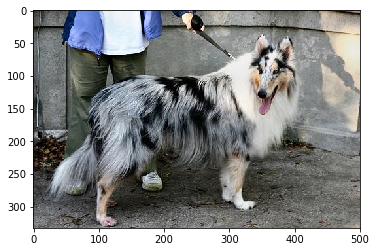

In [13]:
img = cv2.imread(picture_path)
pyplot.imshow(cv2.cvtColor(img, cv2.CV_32S))

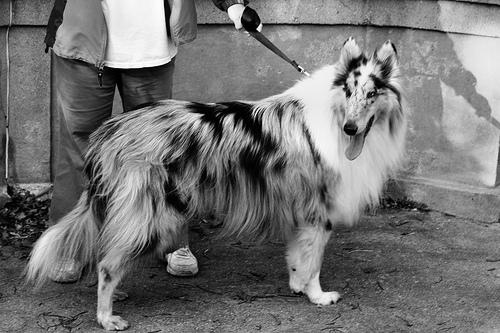

In [14]:
def to_gray(color_img):
    gray = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
    return gray

img_gray = to_gray(img)
Image.fromarray(img_gray)

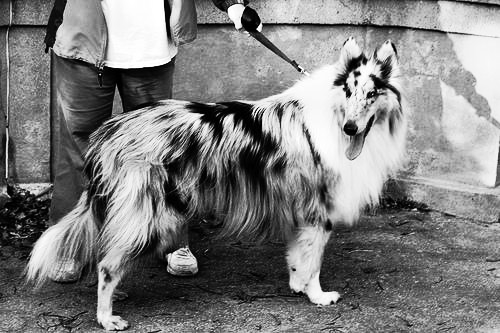

In [15]:
equalized_img = Image.fromarray(img_gray)
equalized_img = equalize(equalized_img)
equalized_img = numpy.array(equalized_img)
Image.fromarray(equalized_img)

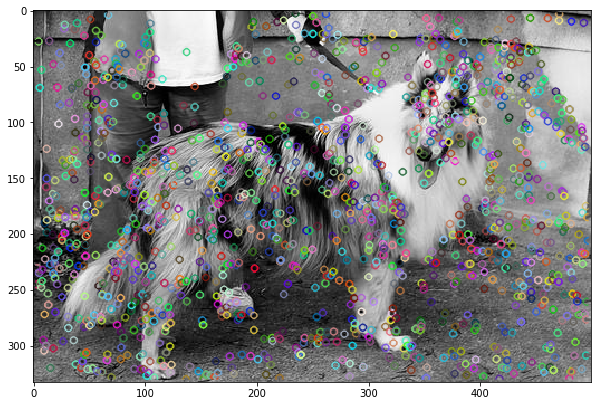

In [16]:
def gen_sift_features(gray_img):
    sift = cv2.xfeatures2d.SIFT_create()
    keypoint, descriptor = sift.detectAndCompute(gray_img, None)
    return keypoint, descriptor

img_kp, img_desc = gen_sift_features(equalized_img)
pyplot.figure(figsize=(10,10))
pyplot.imshow(cv2.drawKeypoints(img_gray, img_kp, img.copy()))

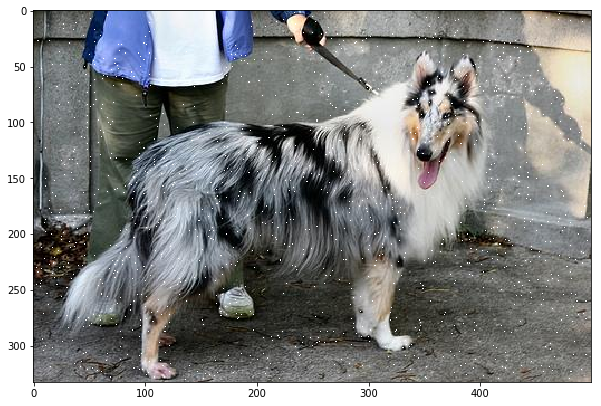

In [17]:
colored_img = cv2.cvtColor(img, cv2.CV_32S)
img_test = colored_img.copy()
pyplot.figure(figsize=(10,10))
X_max = img.shape[0]
Y_max = img.shape[1]


for idx in range(len(img_kp)) :

    y_pixel = int(img_kp[idx].pt[0])
    if y_pixel >= Y_max:
        y_pixel = Y_max-1
        
    x_pixel = int(img_kp[idx].pt[1])
    if x_pixel >= X_max:
        x_pixel = X_max-1
    
    R_value = img_test[x_pixel, y_pixel][0]
    G_value = img_test[x_pixel, y_pixel][1]
    B_value = img_test[x_pixel, y_pixel][2]
    #if (B_value >= 150):
        #img_test[x_pixel, y_pixel] = 255
    img_test[x_pixel, y_pixel] = 255
    
    L_RGB = [R_value,G_value,B_value]
    RGB_mean = numpy.mean([L_RGB])
    
    R_10_percent_low = R_value-0.1*R_value
    R_10_percent_high = R_value+0.1*R_value
    
    G_10_percent_low = G_value-0.1*G_value
    G_10_percent_high = G_value+0.1*G_value
    
    B_10_percent_low = B_value-0.1*B_value
    B_10_percent_high = B_value+0.1*B_value
    
    
    neighbor_RGB_condition = ((RGB_mean>=R_10_percent_low) and (RGB_mean<=R_10_percent_high)) and\
    ((RGB_mean>=G_10_percent_low) and (RGB_mean<=G_10_percent_high)) and\
    ((RGB_mean>=B_10_percent_low) and (RGB_mean<=B_10_percent_high))
    
    if neighbor_RGB_condition:
        dominant_color = 'balance'
        
    elif (R_value>G_value) and (R_value>B_value):
        dominant_color = 'r'
    
    elif (G_value>R_value) and (G_value>B_value):
        dominant_color = 'g'
    
    elif (B_value>R_value) and (B_value>G_value):
        dominant_color = 'b'
        
    #print(dominant_color)
    
pyplot.imshow(img_test)

In [18]:
def find_features_dom_color(myColoredPicture, picture_SIFT_keypoints):
    L_dominant_colors = []
    L_R_values = []
    L_G_values = []
    L_B_values = []
    
    for idx in range(len(picture_SIFT_keypoints)) :

        y_pixel = int(picture_SIFT_keypoints[idx].pt[0])
        if y_pixel >= Y_max:
            y_pixel = Y_max-1

        x_pixel = int(picture_SIFT_keypoints[idx].pt[1])
        if x_pixel >= X_max:
            x_pixel = X_max-1

        R_value = myColoredPicture[x_pixel, y_pixel][0]
        G_value = myColoredPicture[x_pixel, y_pixel][1]
        B_value = myColoredPicture[x_pixel, y_pixel][2]
        
        L_R_values.append(R_value)
        L_G_values.append(G_value)
        L_B_values.append(B_value)

        L_RGB = [R_value,G_value,B_value]
        RGB_mean = numpy.mean([L_RGB])

        R_10_percent_low = R_value-0.1*R_value
        R_10_percent_high = R_value+0.1*R_value

        G_10_percent_low = G_value-0.1*G_value
        G_10_percent_high = G_value+0.1*G_value

        B_10_percent_low = B_value-0.1*B_value
        B_10_percent_high = B_value+0.1*B_value


        balanced_RGB_condition = ((RGB_mean>=R_10_percent_low) and (RGB_mean<=R_10_percent_high)) and\
        ((RGB_mean>=G_10_percent_low) and (RGB_mean<=G_10_percent_high)) and\
        ((RGB_mean>=B_10_percent_low) and (RGB_mean<=B_10_percent_high))

        if balanced_RGB_condition:
            dominant_color = 'balanced'

        elif (R_value>G_value) and (R_value>B_value):
            dominant_color = 'red'

        elif (G_value>R_value) and (G_value>B_value):
            dominant_color = 'green'

        elif (B_value>R_value) and (B_value>G_value):
            dominant_color = 'blue'
        
        elif (R_value==G_value) and (R_value>B_value):
            dominant_color = 'rg'
        
        elif (R_value==B_value) and (R_value>G_value):
            dominant_color = 'rb'
        
        elif (G_value==B_value) and (G_value>R_value):
            dominant_color = 'gb'
        
        L_dominant_colors.append(dominant_color)
        
    dict_results = {'L_R_values':L_R_values,
                    'L_G_values':L_G_values,
                    'L_B_values':L_B_values,
                    'L_dominant_colors':L_dominant_colors}
    
    return(dict_results)

In [19]:
tmp_image_features = pandas.DataFrame(img_desc)
tmp_image_features['race'] = race
tmp_image_features['picture_name'] = picture
tmp_image_features['picture_id'] = 33

L_R_values = find_features_dom_color(colored_img, img_kp)['L_R_values']
tmp_image_features['R_value'] = L_R_values
L_G_values = find_features_dom_color(colored_img, img_kp)['L_G_values']
tmp_image_features['G_value'] = L_G_values
L_B_values = find_features_dom_color(colored_img, img_kp)['L_B_values']
tmp_image_features['B_value'] = L_B_values

L_dominant_colors = find_features_dom_color(colored_img, img_kp)['L_dominant_colors']
tmp_image_features['feature_dominant_color'] = L_dominant_colors


tmp_image_features['feature_id'] = range(0,len(L_dominant_colors))
tmp_image_features

,0,1,2,3,4,5,6,7,8,9,...,126,127,race,picture_name,picture_id,R_value,G_value,B_value,feature_dominant_color,feature_id
0,23.0,0.0,2.0,21.0,14.0,7.0,13.0,47.0,87.0,5.0,...,0.0,0.0,collie,yorkshire_terrier_9739.jpg,33,36,14,3,red,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,9.0,...,66.0,25.0,collie,yorkshire_terrier_9739.jpg,33,36,14,3,red,1
2,1.0,9.0,20.0,57.0,86.0,79.0,3.0,0.0,107.0,33.0,...,0.0,0.0,collie,yorkshire_terrier_9739.jpg,33,20,16,13,red,2
3,59.0,126.0,22.0,7.0,7.0,2.0,0.0,8.0,31.0,126.0,...,0.0,0.0,collie,yorkshire_terrier_9739.jpg,33,20,16,13,red,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,75.0,27.0,collie,yorkshire_terrier_9739.jpg,33,15,15,7,rg,4
5,2.0,4.0,1.0,0.0,0.0,0.0,2.0,1.0,40.0,38.0,...,9.0,4.0,collie,yorkshire_terrier_9739.jpg,33,92,64,50,red,5
6,50.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,97.0,3.0,...,3.0,76.0,collie,yorkshire_terrier_9739.jpg,33,83,87,88,balanced,6
7,8.0,34.0,40.0,105.0,85.0,9.0,1.0,0.0,18.0,47.0,...,3.0,7.0,collie,yorkshire_terrier_9739.jpg,33,6,2,0,red,7
8,2.0,3.0,72.0,130.0,24.0,2.0,1.0,1.0,29.0,5.0,...,0.0,6.0,collie,yorkshire_terrier_9739.jpg,33,61,60,58,balanced,8
9,28.0,0.0,1.0,3.0,0.0,0.0,5.0,49.0,159.0,0.0,...,0.0,1.0,collie,yorkshire_terrier_9739.jpg,33,190,199,204,balanced,9


In [20]:
# do so for all pictures
N_RACES = 120
N_FILTERED_RACES = 10
L_races_indexes = list(range(0,N_RACES))
L_filtered_indexes = random.sample(L_races_indexes, N_FILTERED_RACES)
L_filtered_races = [L_races[i] for i in L_filtered_indexes]
L_filtered_races = list(numpy.sort(L_filtered_races))
L_filtered_races

['brittany_spaniel',
 'chow',
 'doberman',
 'english_setter',
 'irish_water_spaniel',
 'kerry_blue_terrier',
 'lakeland_terrier',
 'miniature_schnauzer',
 'newfoundland',
 'papillon']

In [21]:
pickle.dump(N_FILTERED_RACES,open(pickle_path+"N_FILTERED_RACES_last_execution.p", "wb"))
pickle.dump(L_filtered_races,open(pickle_path+"L_%s_filtered_races.p"%(N_FILTERED_RACES), "wb"))

In [22]:
L_schema_columns = []

for col in ['picture_id', 'race', 'picture_name', 'feature_id', 'R_value', 'G_value', 'B_value', 'feature_dominant_color']:
    L_schema_columns.append(col)

# 128 SIFT features
L_schema_columns += list(range(128))
L_schema_columns

['picture_id',
 'race',
 'picture_name',
 'feature_id',
 'R_value',
 'G_value',
 'B_value',
 'feature_dominant_color',
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127]

In [23]:
df_final_DataFrame_schema = pandas.DataFrame(columns = L_schema_columns)
df_final_DataFrame_schema

,picture_id,race,picture_name,feature_id,R_value,G_value,B_value,feature_dominant_color,0,1,...,118,119,120,121,122,123,124,125,126,127


In [24]:
start_time = time.time()

ID = 0
dict_id_sift_params = {}

# initialize train and test dataframes
df_train = df_final_DataFrame_schema.copy()
df_test = df_final_DataFrame_schema.copy()

for race in L_filtered_races:
    print(race)
    
    for picture in dict_race_pictures[race]:
        picture_path = race_path + race + "\\" + picture
        img = cv2.imread(picture_path)
        img_gray = to_gray(img)
        equalized_img = Image.fromarray(img_gray)
        equalized_img = equalize(equalized_img)
        equalized_img = numpy.array(equalized_img)
        
        img_rgb = cv2.cvtColor(img, cv2.CV_32S)
        
        img_kp, img_desc = gen_sift_features(equalized_img)
        dict_id_sift_params[ID] = img_kp
        
        # build a DataFrame object with the SIFT descriptors of the picture
        tmp_image_features = pandas.DataFrame(img_desc)
        tmp_image_features['race'] = race
        tmp_image_features['picture_name'] = picture
        tmp_image_features['picture_id'] = ID
        
        L_R_values = find_features_dom_color(img_rgb, img_kp)['L_R_values']
        tmp_image_features['R_value'] = L_R_values
        L_G_values = find_features_dom_color(img_rgb, img_kp)['L_G_values']
        tmp_image_features['G_value'] = L_G_values
        L_B_values = find_features_dom_color(img_rgb, img_kp)['L_B_values']
        tmp_image_features['B_value'] = L_B_values

        L_dominant_colors = find_features_dom_color(img_rgb, img_kp)['L_dominant_colors']
        tmp_image_features['feature_dominant_color'] = L_dominant_colors

        tmp_image_features['feature_id'] = range(0, len(L_dominant_colors))
        
        if picture in dict_race_pictures_test[race]:
            df_test = df_test.append(tmp_image_features)
        else:
            df_train = df_train.append(tmp_image_features)
        
        ID += 1
print("STEP TIME: %ss" % (time.time() - start_time))

brittany_spaniel


C:\Users\Allen\Desktop\dogs\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


chow
doberman
english_setter
irish_water_spaniel
kerry_blue_terrier
lakeland_terrier
miniature_schnauzer
newfoundland
papillon
Step time: 1185.1982374191284s


In [25]:
feature_id = 0
dict_pictures_features_caracs = {}

for picture_id in dict_id_sift_params.keys():
    dict_pictures_features_caracs[picture_id] = {}
    L_keypoint = dict_id_sift_params[picture_id]
    L_keypoint_id = list(range(0,len(L_keypoint)))
    
    for keypoint, keypoint_id in zip(L_keypoint,L_keypoint_id):        
            dict_pictures_features_caracs[picture_id][keypoint_id] = keypoint.pt
    
    feature_id += 1

In [26]:
def values_to_col(myDataFrame, myColumnList, boolOldName):

    created_columns = []
    dict_mapping = {}
    for column in myColumnList:
        # filling missing values
        myDataFrame[column].fillna('none', inplace=True)
        newFeatures = []
        corpus = myDataFrame[column]
        vectorizer = CountVectorizer(min_df=1, max_df=1.0)

        # construction
        X = vectorizer.fit_transform(corpus).toarray()
        feature_names = vectorizer.get_feature_names()

        for feature in feature_names:
            if boolOldName:
                newFeatureName = '%s_%s' % (column, feature)
            else:
                newFeatureName = feature

            newFeatures.append(newFeatureName)
            created_columns.append(newFeatureName)

            if column in dict_mapping:
                dict_mapping[column].append(newFeatureName)
            else:
                dict_mapping[column] = [newFeatureName]

        featuredFrame = pandas.DataFrame(X, columns=newFeatures)
        myDataFrame = pandas.concat([myDataFrame, featuredFrame], axis=1, join_axes=[featuredFrame.index])
        myDataFrame['created_columns'] = [created_columns] * len(myDataFrame)
        myDataFrame['dict_mapping'] = [dict_mapping] * len(myDataFrame)

    return myDataFrame

In [27]:
df_train.index = range(len(df_train))
df_train = values_to_col(df_train,['feature_dominant_color'], True)
df_train

,B_value,G_value,R_value,feature_dominant_color,feature_id,picture_id,picture_name,race,0,1,...,127,feature_dominant_color_balanced,feature_dominant_color_blue,feature_dominant_color_gb,feature_dominant_color_green,feature_dominant_color_rb,feature_dominant_color_red,feature_dominant_color_rg,created_columns,dict_mapping
0,218,198,193,balanced,0,0,brittany_spaniel_10017.jpg,brittany_spaniel,18.0,62.0,...,0.0,1,0,0,0,0,0,0,"[feature_dominant_color_balanced, feature_domi...",{'feature_dominant_color': ['feature_dominant_...
1,218,198,193,balanced,1,0,brittany_spaniel_10017.jpg,brittany_spaniel,0.0,0.0,...,33.0,1,0,0,0,0,0,0,"[feature_dominant_color_balanced, feature_domi...",{'feature_dominant_color': ['feature_dominant_...
2,228,208,203,balanced,2,0,brittany_spaniel_10017.jpg,brittany_spaniel,118.0,70.0,...,20.0,1,0,0,0,0,0,0,"[feature_dominant_color_balanced, feature_domi...",{'feature_dominant_color': ['feature_dominant_...
3,218,191,187,balanced,3,0,brittany_spaniel_10017.jpg,brittany_spaniel,23.0,78.0,...,0.0,1,0,0,0,0,0,0,"[feature_dominant_color_balanced, feature_domi...",{'feature_dominant_color': ['feature_dominant_...
4,209,193,187,balanced,4,0,brittany_spaniel_10017.jpg,brittany_spaniel,90.0,62.0,...,3.0,1,0,0,0,0,0,0,"[feature_dominant_color_balanced, feature_domi...",{'feature_dominant_color': ['feature_dominant_...
5,197,178,173,balanced,5,0,brittany_spaniel_10017.jpg,brittany_spaniel,8.0,0.0,...,5.0,1,0,0,0,0,0,0,"[feature_dominant_color_balanced, feature_domi...",{'feature_dominant_color': ['feature_dominant_...
6,235,215,210,balanced,6,0,brittany_spaniel_10017.jpg,brittany_spaniel,10.0,127.0,...,0.0,1,0,0,0,0,0,0,"[feature_dominant_color_balanced, feature_domi...",{'feature_dominant_color': ['feature_dominant_...
7,227,208,203,balanced,7,0,brittany_spaniel_10017.jpg,brittany_spaniel,0.0,0.0,...,3.0,1,0,0,0,0,0,0,"[feature_dominant_color_balanced, feature_domi...",{'feature_dominant_color': ['feature_dominant_...
8,231,205,198,balanced,8,0,brittany_spaniel_10017.jpg,brittany_spaniel,3.0,9.0,...,0.0,1,0,0,0,0,0,0,"[feature_dominant_color_balanced, feature_domi...",{'feature_dominant_color': ['feature_dominant_...
9,120,160,219,red,9,0,brittany_spaniel_10017.jpg,brittany_spaniel,33.0,131.0,...,6.0,0,0,0,0,0,1,0,"[feature_dominant_color_balanced, feature_domi...",{'feature_dominant_color': ['feature_dominant_...


In [28]:
df_test.index = range(len(df_test))
df_test = values_to_col(df_test,['feature_dominant_color'], True)
df_test

,B_value,G_value,R_value,feature_dominant_color,feature_id,picture_id,picture_name,race,0,1,...,127,feature_dominant_color_balanced,feature_dominant_color_blue,feature_dominant_color_gb,feature_dominant_color_green,feature_dominant_color_rb,feature_dominant_color_red,feature_dominant_color_rg,created_columns,dict_mapping
0,88,137,153,red,0,9,brittany_spaniel_10527.jpg,brittany_spaniel,11.0,0.0,...,5.0,0,0,0,0,0,1,0,"[feature_dominant_color_balanced, feature_domi...",{'feature_dominant_color': ['feature_dominant_...
1,74,124,154,red,1,9,brittany_spaniel_10527.jpg,brittany_spaniel,0.0,0.0,...,1.0,0,0,0,0,0,1,0,"[feature_dominant_color_balanced, feature_domi...",{'feature_dominant_color': ['feature_dominant_...
2,69,116,137,red,2,9,brittany_spaniel_10527.jpg,brittany_spaniel,41.0,6.0,...,0.0,0,0,0,0,0,1,0,"[feature_dominant_color_balanced, feature_domi...",{'feature_dominant_color': ['feature_dominant_...
3,76,129,150,red,3,9,brittany_spaniel_10527.jpg,brittany_spaniel,32.0,17.0,...,1.0,0,0,0,0,0,1,0,"[feature_dominant_color_balanced, feature_domi...",{'feature_dominant_color': ['feature_dominant_...
4,65,108,135,red,4,9,brittany_spaniel_10527.jpg,brittany_spaniel,16.0,1.0,...,0.0,0,0,0,0,0,1,0,"[feature_dominant_color_balanced, feature_domi...",{'feature_dominant_color': ['feature_dominant_...
5,75,128,148,red,5,9,brittany_spaniel_10527.jpg,brittany_spaniel,33.0,0.0,...,0.0,0,0,0,0,0,1,0,"[feature_dominant_color_balanced, feature_domi...",{'feature_dominant_color': ['feature_dominant_...
6,74,112,142,red,6,9,brittany_spaniel_10527.jpg,brittany_spaniel,5.0,2.0,...,0.0,0,0,0,0,0,1,0,"[feature_dominant_color_balanced, feature_domi...",{'feature_dominant_color': ['feature_dominant_...
7,88,134,152,red,7,9,brittany_spaniel_10527.jpg,brittany_spaniel,99.0,0.0,...,5.0,0,0,0,0,0,1,0,"[feature_dominant_color_balanced, feature_domi...",{'feature_dominant_color': ['feature_dominant_...
8,87,137,157,red,8,9,brittany_spaniel_10527.jpg,brittany_spaniel,168.0,2.0,...,0.0,0,0,0,0,0,1,0,"[feature_dominant_color_balanced, feature_domi...",{'feature_dominant_color': ['feature_dominant_...
9,58,114,133,red,9,9,brittany_spaniel_10527.jpg,brittany_spaniel,112.0,1.0,...,10.0,0,0,0,0,0,1,0,"[feature_dominant_color_balanced, feature_domi...",{'feature_dominant_color': ['feature_dominant_...


In [29]:
pickle.dump(df_train, open(pickle_path + "df_train_%s_races.p"%(N_FILTERED_RACES), "wb"))
pickle.dump(df_test, open(pickle_path + "df_test_%s_races.p"%(N_FILTERED_RACES), "wb"))
pickle.dump(dict_pictures_features_caracs, open(pickle_path + "dict_pictures_features_caracs_%s_races.p"%(N_FILTERED_RACES), "wb"))